<a href="https://colab.research.google.com/github/Hari25483/Computer-Vision/blob/main/Age_identification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
!unrar x /content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/dataset_age 


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal

Cannot open /content/drive/MyDrive/Freelancing/Thirukumaran.rar
No such file or directory
No files to extract


# 1. Install Dependencies and Setup

In [13]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [14]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.9.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2022.12.7
c

In [15]:
import tensorflow as tf
import os

In [16]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [17]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [18]:
# !pip install unrar
!unzip /content/dataset-2.zip

unzip:  cannot find or open /content/dataset-2.zip, /content/dataset-2.zip.zip or /content/dataset-2.zip.ZIP.


In [19]:
import cv2
import imghdr

In [20]:
data_dir = '/content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets' 

In [21]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [22]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(data_dir):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets/18 below/18 below
Issue with image /content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets/18 below/18 above
Issue with image /content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets/18 above/18 below
Issue with image /content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets/18 above/18 above


# 3. Load Data

In [23]:
import numpy as np
from matplotlib import pyplot as plt


In [25]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets',batch_size = 32,
                                                 shuffle=True,
                                                 seed=42)

Found 1201 files belonging to 2 classes.


In [26]:
tf.keras.utils.image_dataset_from_directory??

In [27]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

In [29]:
batch[1]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

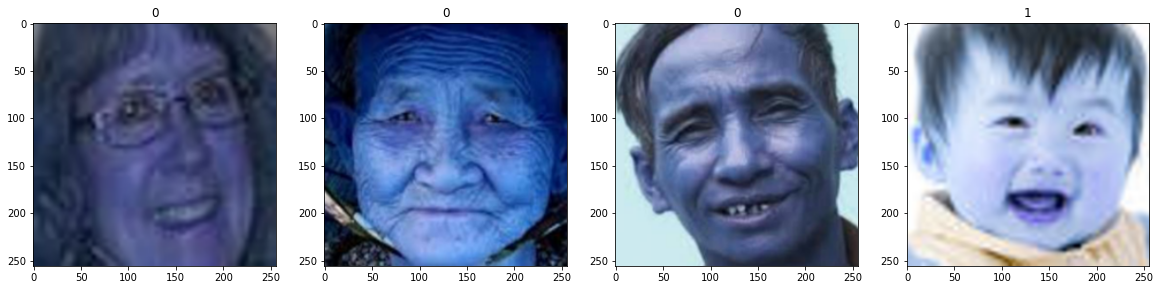

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [32]:
data.as_numpy_iterator().next()

(array([[[[0.54901963, 0.64705884, 0.70980394],
          [0.55220586, 0.6502451 , 0.7129902 ],
          [0.5529412 , 0.6509804 , 0.7137255 ],
          ...,
          [0.60269606, 0.6784314 , 0.74509805],
          [0.6       , 0.6784314 , 0.74509805],
          [0.6       , 0.6784314 , 0.74509805]],
 
         [[0.55220586, 0.6502451 , 0.7129902 ],
          [0.55280334, 0.65084255, 0.71358764],
          [0.5529412 , 0.6509804 , 0.7137255 ],
          ...,
          [0.60269606, 0.6762408 , 0.74290746],
          [0.6       , 0.6784314 , 0.74509805],
          [0.6       , 0.6784314 , 0.74509805]],
 
         [[0.5502451 , 0.6482843 , 0.7110294 ],
          [0.55243564, 0.6504749 , 0.71322   ],
          [0.5529412 , 0.6509804 , 0.7137255 ],
          ...,
          [0.60269606, 0.6757353 , 0.74240196],
          [0.6       , 0.6784314 , 0.74509805],
          [0.6       , 0.6784314 , 0.74509805]],
 
         ...,
 
         [[0.11887255, 0.22352941, 0.33848038],
          [0.12006

# 5. Split Data

In [33]:
len(data)

38

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
test_size = int(len(data)*.2)

In [35]:
train_size

26

In [36]:
val_size

11

In [37]:
test_size

7

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [39]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Flatten())
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 1, activation = 'softmax'))

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
26/26 [==============================] - 77s 3s/step - loss: 0.8004 - accuracy: 0.5889 - val_loss: 0.6503 - val_accuracy: 0.6080
Epoch 2/20
26/26 [==============================] - 10s 337ms/step - loss: 0.6371 - accuracy: 0.6611 - val_loss: 0.6028 - val_accuracy: 0.7017
Epoch 3/20
26/26 [==============================] - 10s 345ms/step - loss: 0.5726 - accuracy: 0.7248 - val_loss: 0.5171 - val_accuracy: 0.7614
Epoch 4/20
26/26 [==============================] - 9s 334ms/step - loss: 0.5027 - accuracy: 0.7692 - val_loss: 0.4914 - val_accuracy: 0.7756
Epoch 5/20
26/26 [==============================] - 8s 283ms/step - loss: 0.4536 - accuracy: 0.7812 - val_loss: 0.4846 - val_accuracy: 0.8068
Epoch 6/20
26/26 [==============================] - 10s 343ms/step - loss: 0.3931 - accuracy: 0.8233 - val_loss: 0.4699 - val_accuracy: 0.8097
Epoch 7/20
26/26 [==============================] - 8s 288ms/step - loss: 0.3601 - accuracy: 0.8534 - val_loss: 0.4325 - val_accuracy: 0.8097
Epoch

# 8. Plot Performance

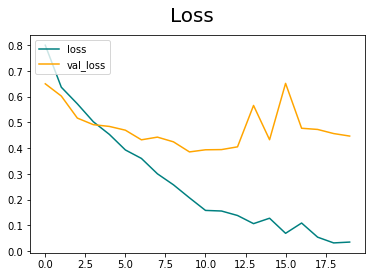

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

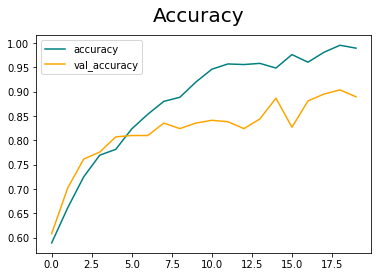

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [59]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 501ms/step


In [60]:
print(pre.result().numpy(), re.result(), acc.result())

1.0 tf.Tensor(0.8181818, shape=(), dtype=float32) tf.Tensor(0.88235295, shape=(), dtype=float32)


# 10. Test

In [61]:
import cv2

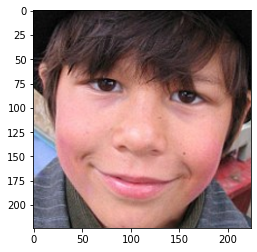

In [68]:
img = cv2.imread('/content/drive/MyDrive/Freelancing/Thirukumaran Anna SLIIT/Age datasets/18 below/10_0_0_20170110224238891.jpg.png')
plt.imshow(img)
plt.show()

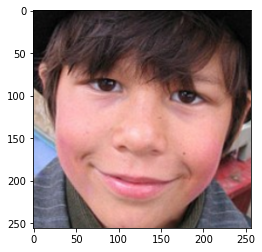

In [69]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [71]:
yhat

array([[0.99998736]], dtype=float32)

In [72]:
if yhat > 0.5: 
    print(f'Less than 18')
else:
    print(f'Greater than 18')

Less than 18


# 11. Save the Model

In [73]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','AgeClassifier.h5'))

In [78]:
new_model = load_model('/content/models/AgeClassifier.h5')

In [79]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


array([[0.99998736]], dtype=float32)

### New Section

In [ ]:
!pip install keras_vggface
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
!pip install keras_applications==1.0.4 --no-deps
!pip install keras_preprocessing==1.0.2 --no-deps
!pip install h5py==2.8.0

In [ ]:
!pip install keras-vggface

In [ ]:
!pip install keras

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import applications
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
import itertools
import os

# Set the input image size
img_size = (224, 224)

# Define the number of classes
num_classes = len(os.listdir('/content/dataset-2'))

# Define the VGGFace2 model
vgg_model = VGGFace(model='resnet50', include_top=False, input_shape=(img_size[0], img_size[1], 3), pooling='avg')

# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

# Add new layers for classification
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create a new model
model = Model(inputs=vgg_model.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define the data generator for training and testing sets
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
generator = datagen.flow_from_directory('/content/dataset-2', target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')

# Train the model
history = model.fit(generator, epochs=epochs, validation_data=datagen.flow_from_directory('path/to/dataset', target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation'))

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# Predict the label of an image
img = load_img('path/to/image', target_size=img_size)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)
label = np.argmax(pred)

# Print the predicted label
print('Predicted label:', label)

# Save the model
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
model.save('saved_models/face_classification_model.h5')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set the path to your dataset
data_path = "/content/dataset-2"

# Set hyperparameters
batch_size = 32
num_epochs = 10
input_shape = (224, 224, 3)

# Get a list of all image paths
image_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

# Create a list of corresponding labels
labels = []
for path in image_paths:
    label = os.path.basename(os.path.dirname(path))
    labels.append(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_list(
    X_train,
    y_train,
    batch_size=batch_size,
    target_size=input_shape[:2],
    shuffle=True,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_list(
    X_test,
    y_test,
    batch_size=batch_size,
    target_size=input_shape[:2],
    shuffle=False,
    class_mode='categorical'
)

# Build your model here
model = tf.keras.models.Sequential([
    # Add your layers here
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator
)

# Save the model
model.save('my_model.h5')

# Plot the accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Make predictions on new images
img_path = "/path/to/new/image.jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=input_shape[:2])
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

predictions = model.predict(img)
